In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import skfmm
import collections
import operator
import cv2


In [11]:
def curvature(ellipse):
    """
    the input of this function is levelset
    output is the curvature
    """
    small=1e-10
    
    [phiy,phix]=np.gradient(ellipse)
    phinorm=np.sqrt(np.square(phiy)+np.square(phix))
    ny=phiy/(phinorm+small)#avoid division by zero
    nx=phix/(phinorm+small)
    [_,nxx]=np.gradient(nx)
    [nyy,_]=np.gradient(ny)
    return nyy+nxx

In [2]:
"""
import the image
convert it to greyscale and reduce the noise
"""
image = skimage.io.imread("D:/Downloads/archive (2)/2pLIF_image.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image=cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)
#gray_image = skimage.color.rgb2gray(image)
#gray_image = gray_image - np.mean(gray_image)
# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

(array([[524.,   0.,   0., ...,   0.,   0.,   0.],
        [524.,   0.,   0., ...,   0.,   0.,   0.],
        [524.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [524.,   0.,   0., ...,   0.,   0.,   0.],
        [524.,   0.,   0., ...,   0.,   0.,   0.],
        [524.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0.        , 0.09999985, 0.19999969, 0.29999954, 0.39999938,
        0.49999923, 0.59999908, 0.69999892, 0.79999877, 0.89999861,
        0.99999846]),
 <a list of 460 BarContainer objects>)

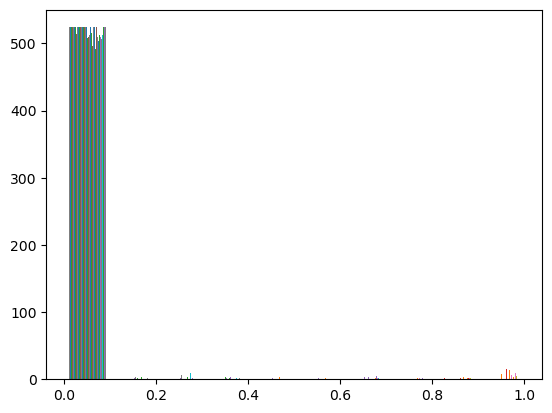

In [3]:
"""
from histogram below, we use a threshold of 0.5
for detection of object

"""
plt.hist(blurred_image,bins=10)

In [4]:
"""
from histogram below, we use a threshold of 0.5
to binarize the image
"""
_, binary = cv2.threshold(blurred_image, 0.8,1, cv2.THRESH_BINARY)


In [9]:
"""
minus the image by 0.5 to create the zero-levelset
in order to use the fast-marching method
"""
phi=binary-0.5
sd=skfmm.distance(phi)

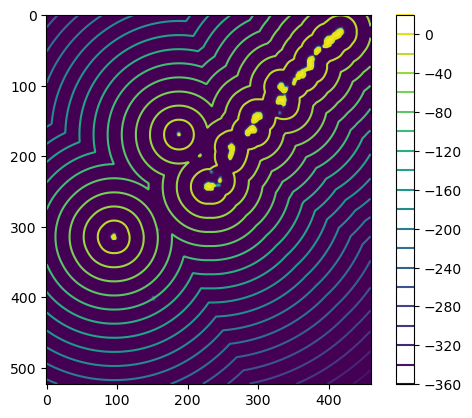

In [10]:
plt.imshow(blurred_image)
plt.contour(sd,20)
plt.colorbar()

In [12]:
curv=curvature(sd)

Text(0.5, 1.0, 'Histogram of curvature')

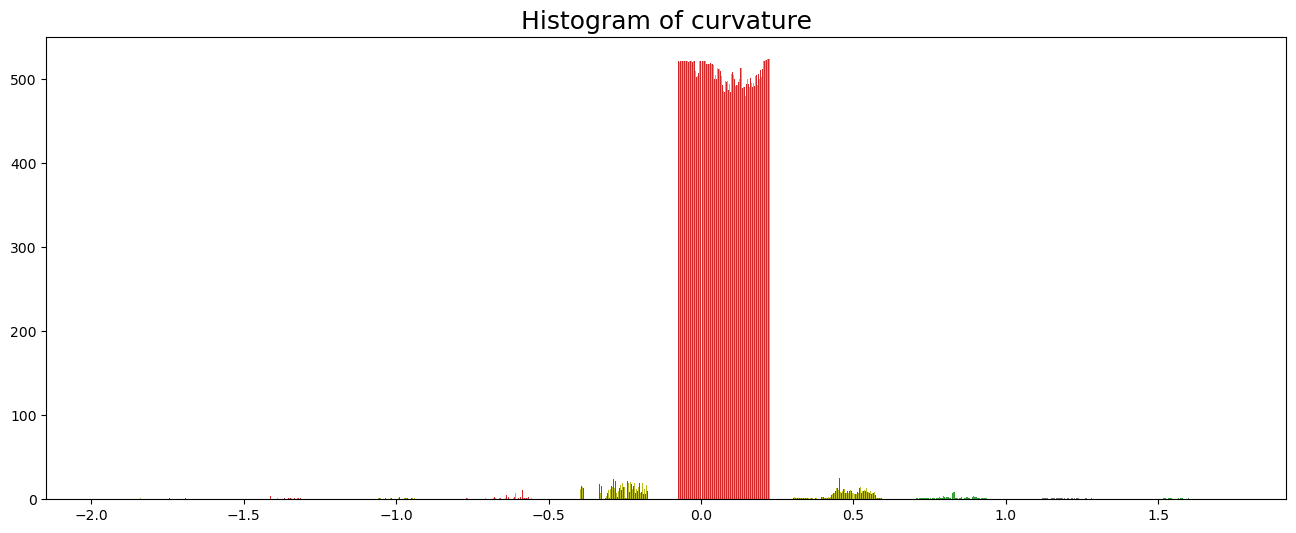

In [15]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(curv,10)

plt.grid(color='white', lw = 0.5, axis='x')
plt.title('Histogram of curvature', fontsize = 18)